In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.manifold import TSNE

In [117]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [118]:
from sklearn.model_selection import train_test_split

## Задание 1


Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных



In [119]:
boston = load_boston()

In [120]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [121]:
data = boston.data

In [122]:
target = boston.target

In [123]:
feature_names = boston.feature_names

In [124]:
X = pd.DataFrame(data = data, columns = feature_names )

In [125]:
y = pd.DataFrame(data = target, columns = ['Price'])

In [126]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [127]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [128]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [129]:
scaled = StandardScaler()

In [130]:
X_train_scalerd = scaled.fit_transform(X_train)

In [131]:
X_train_scalerd = pd.DataFrame(X_train_scalerd, columns = X_train.columns)

In [133]:
X_test_scaled = scaled.fit_transform(X_test)

In [134]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [136]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [137]:
X_train_tsne = tsne.fit_transform(X_train_scalert)

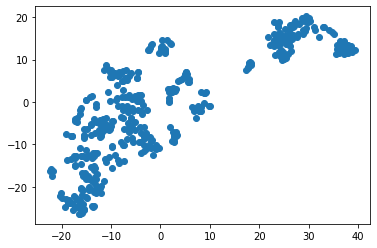

In [199]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

## Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах



In [140]:
from sklearn.cluster import KMeans

In [141]:
kmeans = KMeans(n_clusters = 3 , max_iter = 100, random_state = 42 )

In [142]:
labels_train = kmeans.fit_predict(X_train_tsne)

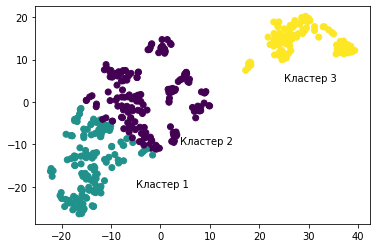

In [200]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)
plt.text(-5,-20, 'Кластер 1' )
plt.text(4,-10, 'Кластер 2')
plt.text(25,5, 'Кластер 3')
plt.show()

In [198]:
for i in range(1,4):
    answer_price = y_train.loc[labels_train == i, 'Price'].mean()
    answerr_CRIM = X_train.loc[labels_train == i, 'CRIM'].mean()
    print(f'Price mean labels_train {i}  = {answer_price}')
    print(f'CRIM mean labels_train {i} = {answerr_CRIM}\n')

Price mean labels_train 1  = 26.564705882352936
CRIM mean labels_train 1 = 0.09462279411764711

Price mean labels_train 2  = 16.277227722772285
CRIM mean labels_train 2 = 13.17982178217822

Price mean labels_train 3  = nan
CRIM mean labels_train 3 = nan



## Задание 3 

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [153]:
X_test_scaled  = scaled.transform(X_test)

In [156]:
X_test_tsne = tsne.fit_transform(X_test_scaler)

In [159]:
labels_test = kmeans.fit_predict(X_test_tsne)

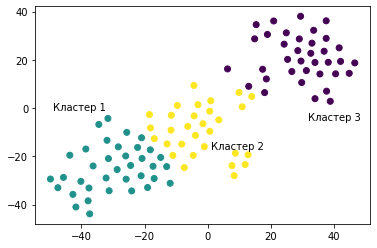

In [201]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c = labels_test)
plt.text(-49,-1, 'Кластер 1')
plt.text(1,-17,'Кластер 2')
plt.text(32,-5, 'Кластер 3')
plt.show()

In [189]:
count = len(pd.value_counts(labels_test))

In [191]:
for i in range(1,count+1):
    answer_price = y_test.loc[labels_test == i,'Price'].mean()
    answer_CRIM = X_test.loc[labels_test == i,'CRIM'].mean()
    
    print(f'Price mean  labels_test {i} = {answer_price}')
    print(f'CRIM mean  labels_test {i} = {answer_CRIM}\n')

Price mean  labels_test 1 = 26.98055555555555
CRIM mean  labels_test 1 = 0.11054861111111111

Price mean  labels_test 2 = 20.853333333333335
CRIM mean  labels_test 2 = 0.3130096666666667

Price mean  labels_test 3 = nan
CRIM mean  labels_test 3 = nan

